# Segmentacion por color HSV

## 1.1 Metodos de adquisición Opencv  

In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import rgb_to_hsv
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]
print(len(flags), "flags total:")

print(flags[40])
trypa = cv2.imread("crop.tiff")
plt.imshow(trypa)
plt.show()

274 flags total:
COLOR_BGR2HLS


<Figure size 640x480 with 1 Axes>

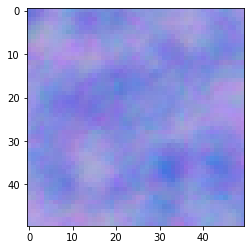

In [2]:
trypa = cv2.cvtColor(trypa, cv2.COLOR_BGR2RGB)

plt.imshow(trypa)
plt.show()

## 1.2 Proyecciones de separacion de colores RGB y HSV

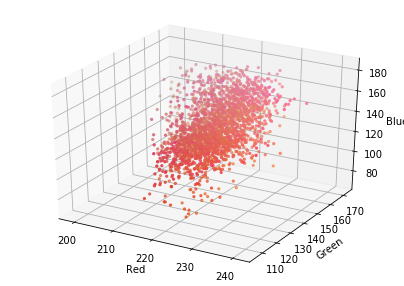

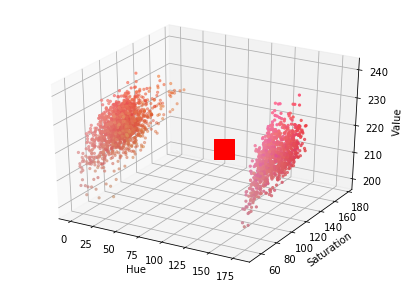

In [4]:
r, g, b = cv2.split(trypa)

fig = plt.figure(figsize=[7,5])
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = trypa.reshape((np.shape(trypa)[0] * np.shape(trypa)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

hsv_trypa = cv2.cvtColor(trypa, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_trypa)

fig = plt.figure(figsize=[7,5])#figsize=[10,10]
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.scatter(119, 101, 221, s=400, c='r', marker='s')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

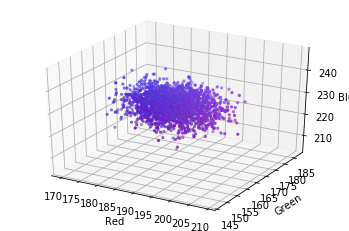

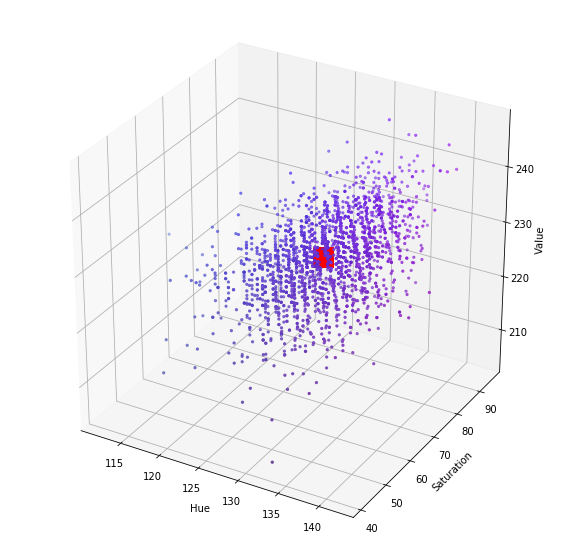

In [26]:
r, g, b = cv2.split(trypa)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = trypa.reshape((np.shape(trypa)[0] * np.shape(trypa)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

hsv_trypa = cv2.cvtColor(trypa, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_trypa)

fig = plt.figure(figsize=[10,10])
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.scatter(130, 70, 229, s=400, c='r', marker='s')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

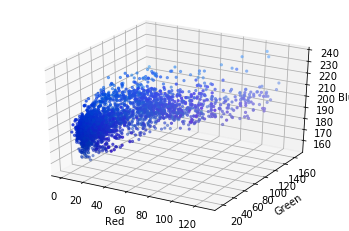

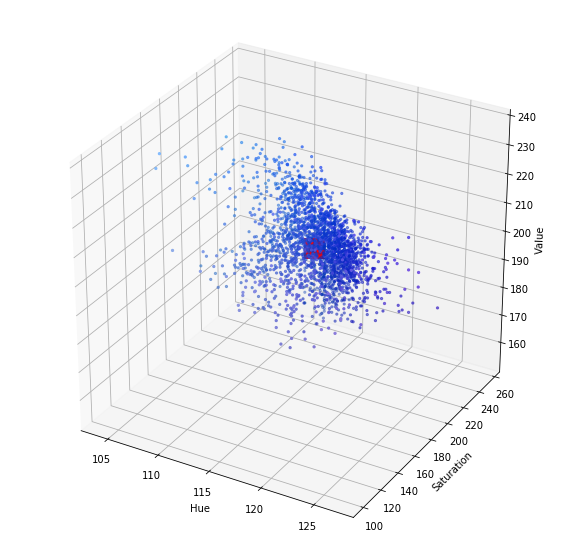

In [60]:
r, g, b = cv2.split(trypa)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = trypa.reshape((np.shape(trypa)[0] * np.shape(trypa)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

hsv_trypa = cv2.cvtColor(trypa, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_trypa)

fig = plt.figure(figsize=[10,10])
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.scatter(114, 218, 192, s=400, c='r', marker='s')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [56]:
import cv2
from sklearn.cluster import KMeans
import pandas as pd

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    DISTANCIA = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        img = cv2.imread(self.IMAGE)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        self.IMAGE = img
        
        kmeans = KMeans(n_clusters = self.CLUSTERS, precompute_distances=False)
        kmeans.fit(img)
        dist= kmeans.transform(img)
       # self.DISTANCIA = dist
       # return self.DISTANCIA.astype(int)
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = 'crop_b.tiff'
clusters = 1
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()

print(colors)
#print(np.mean(colors))
#np.savetxt("distancias.csv",colors, delimiter=",", fmt="%s")

[[114 218 192]]


## 1.3 Determinacion de los valores de mascaras de segmentacion

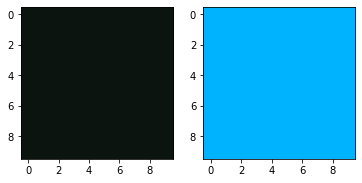

In [10]:
azul_dark =  (110, 100, 20)
azul_light = (140, 255, 255)
al_square = np.full((10, 10, 3), azul_light, dtype=np.uint8)/ 255
ad_square = np.full((10, 10, 3), azul_dark, dtype=np.uint8)/ 255

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(ad_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(al_square))
plt.show()

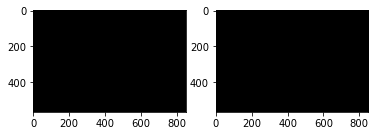

[[164 135 149 ... 192 192 193]
 [122  99 113 ... 162 164 164]
 [136 111 123 ... 171 171 172]
 ...
 [212 201 206 ... 164 158 158]
 [210 198 202 ... 174 165 164]
 [214 202 205 ... 185 179 177]]


In [13]:
#mascara del filtro
mask = cv2.inRange(hsv_trypa, azul_light, azul_dark)
#resultado
result = cv2.bitwise_and(trypa, trypa, mask=mask)
#HSV a RGB para ploteo
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


## 1.4 Segmentacion mascara azul, imagen original y resultado con convolucion

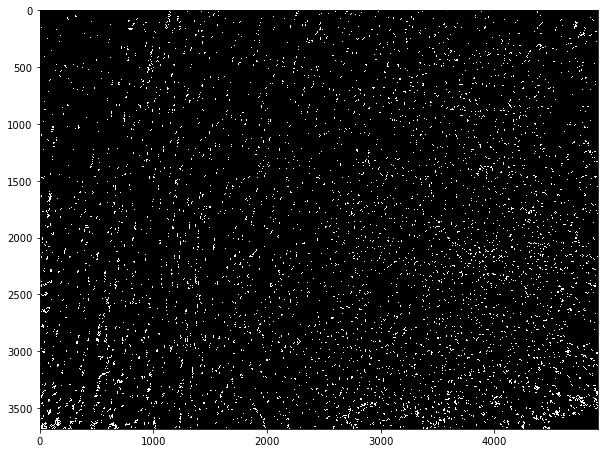

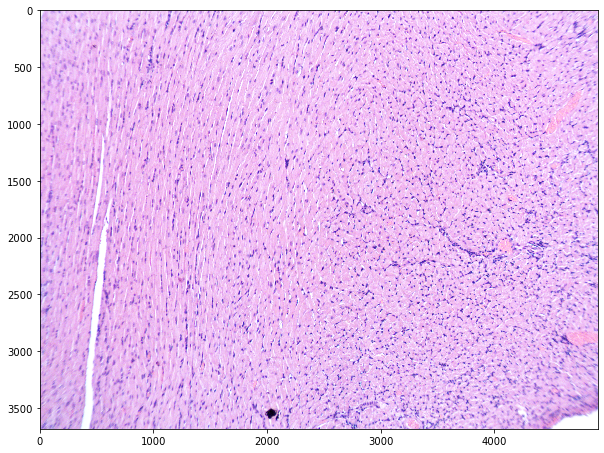

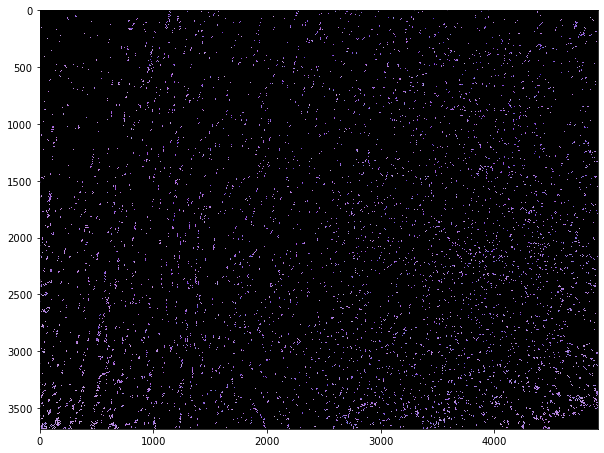

In [8]:
img = cv2.imread("461-0121.tif")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(110, 50, 210), (140, 255, 225) )
result = cv2.bitwise_and(img, img, mask=mask)
trypa = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imsave('blue_mask_3.png',mask, cmap="gray")



plt.figure(figsize=[10,10])
plt.imshow(mask, cmap="gray")
plt.figure(figsize=[10,10])
plt.imshow(rgb)
plt.figure(figsize=[10,10])
plt.imshow(trypa)
plt.show()



## 1.5 Segmentacion mascara rosa, Imagen original y convolucion

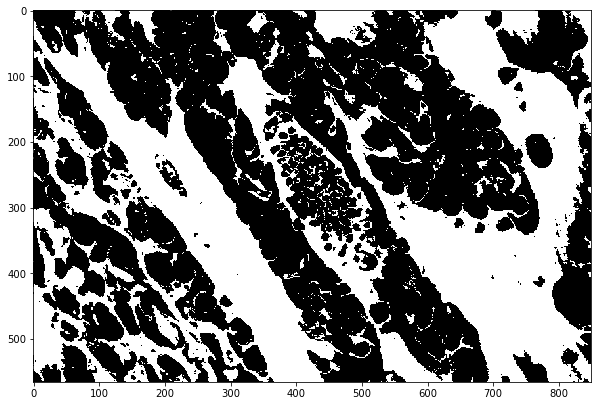

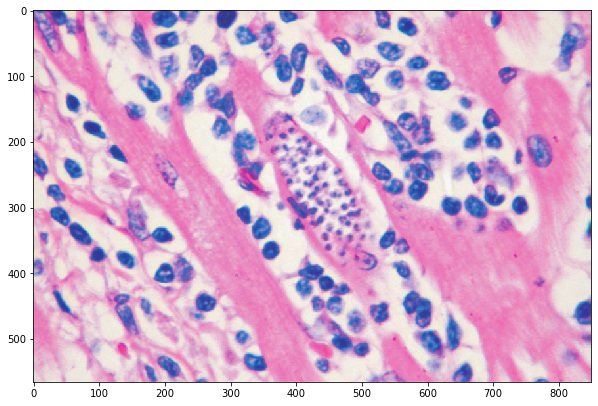

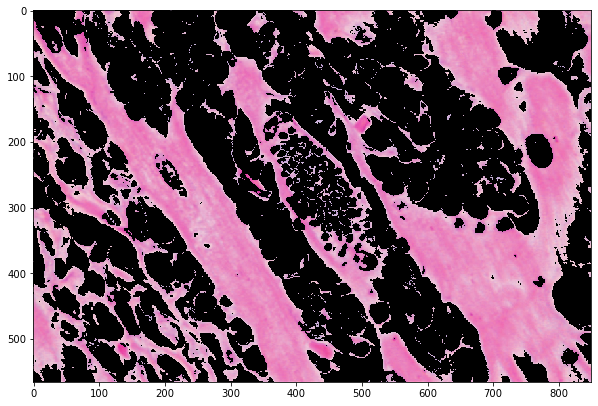

In [4]:
img = cv2.imread(r"C:\Users\taker\Desktop\Trypanosoma\ejemplo.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask_pink = cv2.inRange(hsv,(135, 40, 120), (180, 255, 255) )
result = cv2.bitwise_and(img, img, mask=mask_pink)
trypa = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imsave('pink_mask.png',trypa)


plt.figure(figsize=[10,10])
plt.imshow(mask_pink, cmap="gray")
plt.figure(figsize=[10,10])
plt.imshow(rgb)
plt.figure(figsize=[10,10])
plt.imshow(trypa)
plt.show()

## 1.6 Segmentacion con las dos mascaras, imagen original y convolucion

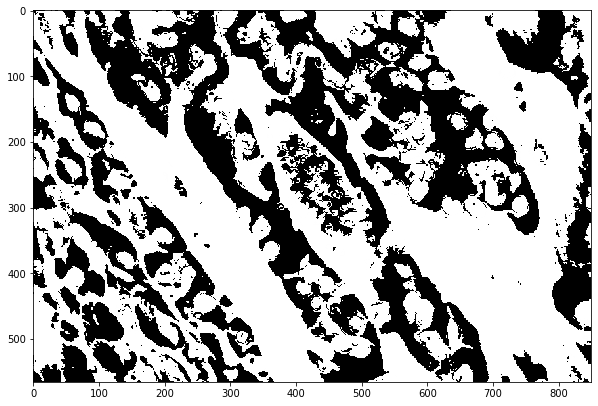

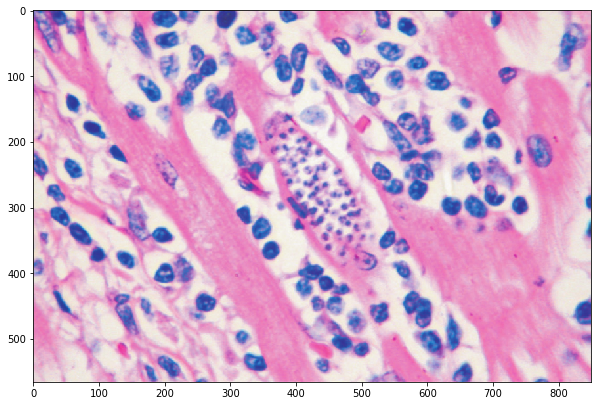

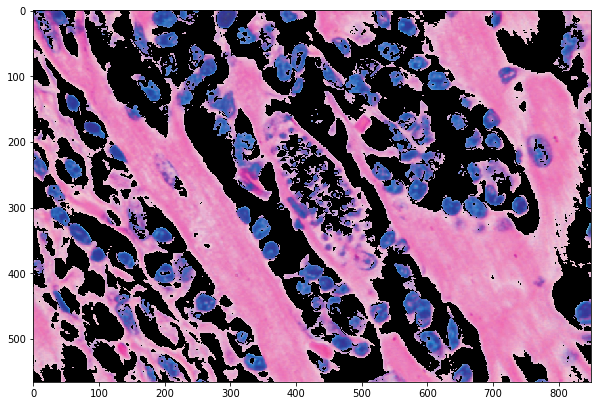

In [9]:
img = cv2.imread(r"C:\Users\taker\Desktop\Trypanosoma\ejemplo.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(100, 100, 120), (140, 255, 255) )
mask_pink = cv2.inRange(hsv,(135, 40, 120), (180, 255, 255) )
final_mask= mask + mask_pink
final_result = cv2.bitwise_and(img, img, mask=final_mask)
trypa = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)



plt.figure(figsize=[10,10])
plt.imshow(final_mask, cmap="gray")
plt.figure(figsize=[10,10])
plt.imshow(rgb)
plt.figure(figsize=[10,10])
plt.imshow(trypa)
plt.show()

## 1.7 Proceso de deteccion de bordes

In [9]:
import numpy as np
import cv2
 
# Cargamos la imagen
original = cv2.imread('blue_mask_3.png')
cv2.imshow("original", original)

# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
cv2.imshow("suavizado", gauss) 
 
# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 100)
 
cv2.imshow("canny", canny)
 
# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de objetos por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv2.drawContours(original,contornos,-1,(0,0,255), 2)
cv2.imshow("contornos", original)
cv2.imwrite('Contornos.png', original)
cv2.imwrite('Contornos2.png', canny)
cv2.waitKey(0)

He encontrado 20450 objetos


32

## 1.8 Proceso de etiquetado en la mascara de intertes(azul)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import numpy as np
import cv2


image = cv2.imread(r"C:\Users\taker\Desktop\AI28-1\BM_3.jpg")
gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply threshold
thresh = threshold_otsu(gris)
bw = closing(gris > thresh, square(4))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area <= 80:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
print(region.bbox)
ax.set_axis_off()
plt.tight_layout()
plt.show()

(1014, 632, 1022, 639)


<Figure size 1000x600 with 1 Axes>

## 1.9 Proceso completo de segmentacion "Presentable"

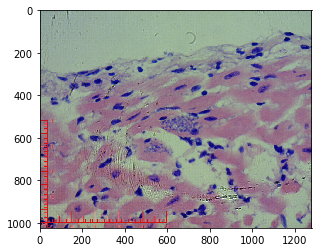

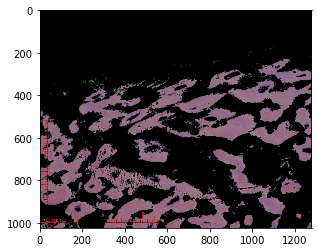

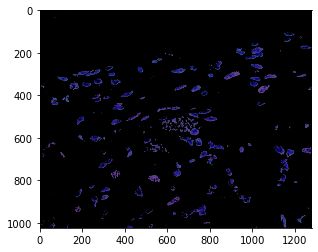

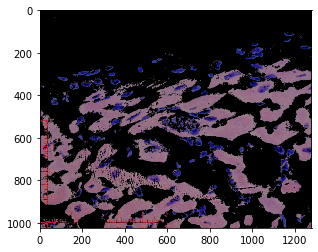

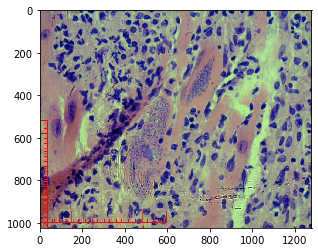

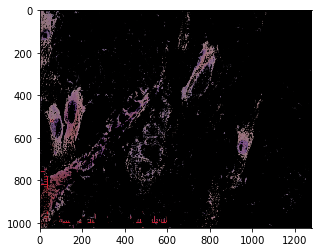

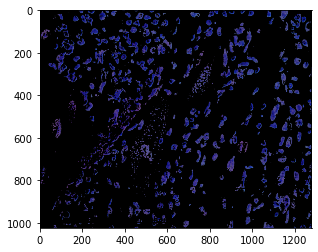

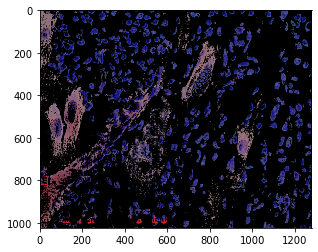

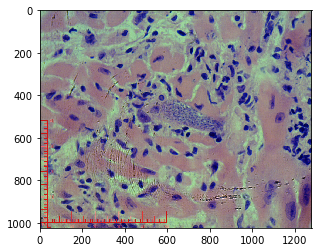

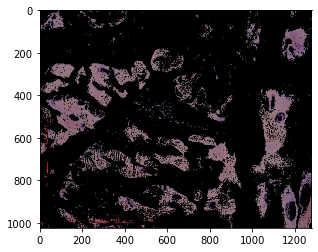

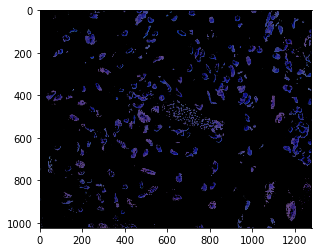

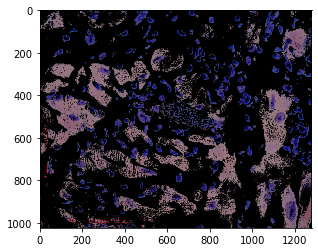

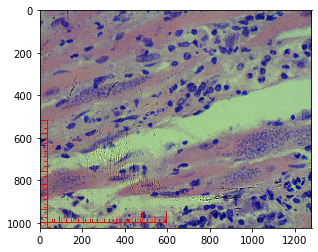

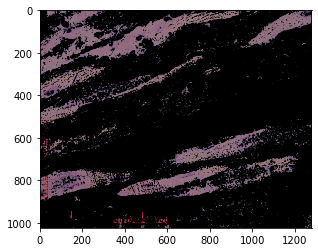

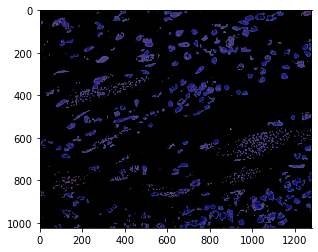

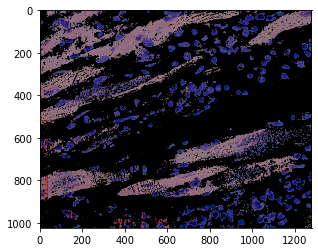

In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.colors import hsv_to_rgb
path = r"C:\Users\taker\Desktop\AI28-1\AM_"
path_save_b = r"C:\Users\taker\Desktop\AI28-1\BM_"
path_save_p = r"C:\Users\taker\Desktop\AI28-1\PM_"
amastigotes = []
for i in range(4):
    truzi = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    amastigotes.append(truzi)
def segment(image_pink):
    hsv_image = cv2.cvtColor(image_pink, cv2.COLOR_RGB2HSV)
    light_pink = (135, 40, 120)
    dark_pink = (180, 255, 255)
    mask_pink = cv2.inRange(hsv_image, light_pink, dark_pink)
    resultp = cv2.bitwise_and(image_pink, image_pink, mask=mask_pink)
    resultp = cv2.GaussianBlur(resultp, (5, 5), 0)
    return resultp
resultsp = [segment(truzi) for truzi in amastigotes]
def segment(image_blue):
    hsv_image = cv2.cvtColor(image_blue, cv2.COLOR_RGB2HSV)
    light_blue = (100, 100, 120)
    dark_blue = (140, 255, 255)
    mask_blue = cv2.inRange(hsv_image, light_blue, dark_blue)
    resultb = cv2.bitwise_and(image_blue, image_blue, mask=mask_blue)
    resultb = cv2.GaussianBlur(resultb, (5, 5), 0)
    return resultb
resultsb = [segment(truzi) for truzi in amastigotes]
def segment(image_bp):
    hsv_image = cv2.cvtColor(image_bp, cv2.COLOR_RGB2HSV)
    light_pink = (135, 40, 120)
    dark_pink = (180, 255, 255)
    mask_pink = cv2.inRange(hsv_image, light_pink, dark_pink)
    light_blue = (100, 100, 120)
    dark_blue = (140, 255, 255)
    mask_blue = cv2.inRange(hsv_image, light_blue, dark_blue)
    final_mask = mask_pink + mask_blue
    resultbp = cv2.bitwise_and(image_bp, image_bp, mask=final_mask)
    resultbp = cv2.GaussianBlur(resultbp, (5, 5), 0)
    return resultbp
resultsbp = [segment(truzi) for truzi in amastigotes]

for i in range(0, 4):

 
    plt.imshow(amastigotes[i])
    plt.show()

    plt.imshow(resultsp[i])
    plt.imsave(path_save_p + str(i) + ".jpg",resultsp[i])
    plt.show()

    plt.imshow(resultsb[i])
    plt.imsave(path_save_b + str(i) + ".jpg",resultsb[i])
    plt.show()

    plt.imshow(resultsbp[i])
    plt.show()
   
   

## Normalizacion WIP

In [ ]:
import staintools
import datetime

# Set up
METHOD = 'vahadane'
STANDARDIZE_BRIGHTNESS = True
RESULTS_DIR = './results ' + str(datetime.datetime.now()) + '/'

# Read the images
i1 = staintools.read_image(r"C:\Users\taker\Desktop\Trypanosoma\ejemplo.png")
i2 = staintools.read_image(r"C:\Users\taker\Desktop\AI28-1\AM_0")
i3 = staintools.read_image(r"C:\Users\taker\Desktop\AI28-1\AM_")
i4 = staintools.read_image("./data/i4.png")
i5 = staintools.read_image("./data/i5.png")

# Plot
images = [i1, i2, i3, i4, i5]
titles = ["Target"] + ["Original"] * 4
staintools.plot_image_list(images, width=5, title_list=titles,
                           save_name=RESULTS_DIR + 'original-images.png', show=0)

# =========================
# Brightness standardization
# (Can skip but can help with tissue mask detection)
# =========================

if STANDARDIZE_BRIGHTNESS:
    # Standardize brightness
    i1 = staintools.LuminosityStandardizer.standardize(i1)
    i2 = staintools.LuminosityStandardizer.standardize(i2)
    i3 = staintools.LuminosityStandardizer.standardize(i3)
    i4 = staintools.LuminosityStandardizer.standardize(i4)
    i5 = staintools.LuminosityStandardizer.standardize(i5)

    # Plot
    images = [i1, i2, i3, i4, i5]
    titles = ["Target standardized"] + ["Original standardized"] * 4
    staintools.plot_image_list(images, width=5, title_list=titles,
                               save_name=RESULTS_DIR + 'original-images-standardized.png', show=0)

# WIP

In [19]:
#shape
trypa = cv2.imread(r"C:\Users\taker\Desktop\COMPARTIDO AGOSTO 2019\AI25-1\VD.jpg")
print('Type of the image : ' , type(trypa))
print()
print('Shape of the image : {}'.format(trypa.shape))
print('Image Hight {}'.format(trypa.shape[0]))
print('Image Width {}'.format(trypa.shape[1]))
print('Dimension of Image {}'.format(trypa.ndim))

#size
print('Image size {}'.format(trypa.size))
print('Maximum RGB value in this image {}'.format(trypa.max()))
print('Minimum RGB value in this image {}'.format(trypa.min()))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (1944, 2592, 3)
Image Hight 1944
Image Width 2592
Dimension of Image 3
Image size 15116544
Maximum RGB value in this image 255
Minimum RGB value in this image 0


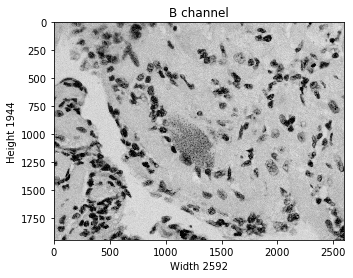

In [21]:
plt.title('B channel')
plt.ylabel('Height {}'.format(trypa.shape[0]))
plt.xlabel('Width {}'.format(trypa.shape[1]))

plt.imshow(trypa[ : , : , 2], cmap="gray")
plt.show()
plt.imsave('demo.tiff', trypa[:,:,2],cmap="gray")

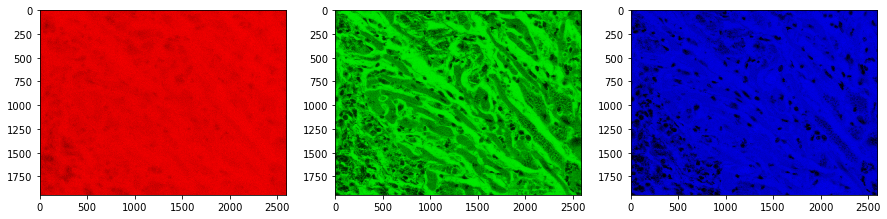

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(trypa.shape, dtype="uint8") 
    
    # assing each channel 
    split_img[ :, :, c] = trypa[ :, :, c]
    
    # display each channel
    ax.imshow(split_img, cmap="gray")
 

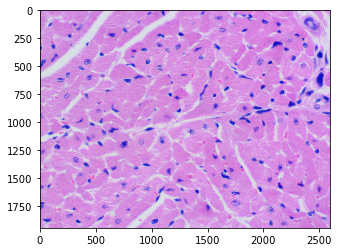

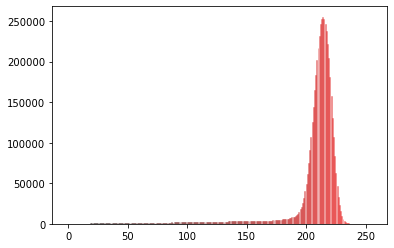

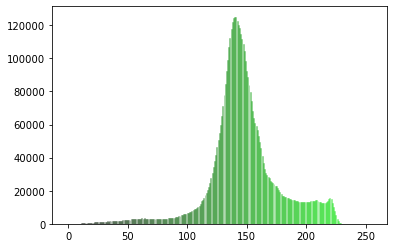

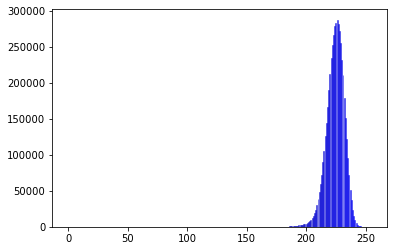

In [35]:
from PIL import Image

import matplotlib.pyplot as plt

 

def getRed(redVal):

    return '#%02x%02x%02x' % (redVal, 0, 0)

 

def getGreen(greenVal):

    return '#%02x%02x%02x' % (0, greenVal, 0)

   

def getBlue(blueVal):

    return '#%02x%02x%02x' % (0, 0, blueVal)

 



# Create an Image with specific RGB value

image = Image.open(r"C:\Users\taker\Desktop\COMPARTIDO AGOSTO 2019\AI25-2\VI.jpg")
pixels = np.asarray(image)

 

# Modify the color of two pixels

image.putpixel((0,1), (1,1,5))

image.putpixel((0,2), (2,1,5))

 

# Display the image
plt.figure(0)
plt.imshow(image)

 

# Get the color histogram of the image

histogram = image.histogram()

 

# Take only the Red counts

l1 = histogram[0:256]

 

# Take only the Blue counts

l2 = histogram[256:512]

 

# Take only the Green counts

l3 = histogram[512:768]

 

plt.figure(1)

 

# R histogram

for i in range(0, 256):

    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

 

# G histogram

plt.figure(2)

for i in range(0, 256):

    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)

 

 

# B histogram

plt.figure(3)

for i in range(0, 256):

    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.5)

 

plt.show()
np.savetxt("pixel_dataR.csv",l1, delimiter=",", fmt="%s")
np.savetxt("pixel_dataG.csv",l2, delimiter=",", fmt="%s")
np.savetxt("pixel_dataB.csv",l3, delimiter=",", fmt="%s")

In [1]:
import cv2,argparse,glob
import numpy as np

# mouse callback function
def showPixelValue(event,x,y,flags,param):
    global img, combinedResult, placeholder
    
    if event == cv2.EVENT_MOUSEMOVE:
        # get the value of pixel from the location of mouse in (x,y)
        bgr = img[y,x]

        # Convert the BGR pixel into other colro formats
        ycb = cv2.cvtColor(np.uint8([[bgr]]),cv2.COLOR_BGR2YCrCb)[0][0]
        lab = cv2.cvtColor(np.uint8([[bgr]]),cv2.COLOR_BGR2Lab)[0][0]
        hsv = cv2.cvtColor(np.uint8([[bgr]]),cv2.COLOR_BGR2HSV)[0][0]
        
        # Create an empty placeholder for displaying the values
        placeholder = np.zeros((img.shape[0],400,3),dtype=np.uint8)

        # fill the placeholder with the values of color spaces
        cv2.putText(placeholder, "BGR {}".format(bgr), (20, 70), cv2.FONT_HERSHEY_COMPLEX, .9, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(placeholder, "HSV {}".format(hsv), (20, 140), cv2.FONT_HERSHEY_COMPLEX, .9, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(placeholder, "YCrCb {}".format(ycb), (20, 210), cv2.FONT_HERSHEY_COMPLEX, .9, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(placeholder, "LAB {}".format(lab), (20, 280), cv2.FONT_HERSHEY_COMPLEX, .9, (255,255,255), 1, cv2.LINE_AA)
        
        # Combine the two results to show side by side in a single image
        combinedResult = np.hstack([img,placeholder])
        
        cv2.imshow('PRESS P for Previous, N for Next Image',combinedResult)


if __name__ == '__main__' :
     
    # load the image and setup the mouse callback function
    global img
    files = glob.glob(r"demo.tiff")
    files.sort()
    img = cv2.imread(files[0])
    img = cv2.resize(img,(900,600))
    cv2.imshow('PRESS P for Previous, N for Next Image',img)

    # Create an empty window
    cv2.namedWindow('PRESS P for Previous, N for Next Image')
    # Create a callback function for any event on the mouse
    cv2.setMouseCallback('PRESS P for Previous, N for Next Image',showPixelValue)
    i = 0
    while(1):
        k = cv2.waitKey(1) & 0xFF
        # check next image in the folder
        if k == ord('n'):
            i += 1
            img = cv2.imread(files[i%len(files)])
            img = cv2.resize(img,(900,600))
            cv2.imshow('PRESS P for Previous, N for Next Image',img)
 
        # check previous image in folder
        elif k == ord('p'):
            i -= 1
            img = cv2.imread(files[i%len(files)])
            img = cv2.resize(img,(900,600))
            cv2.imshow('PRESS P for Previous, N for Next Image',img)

        elif k == 27:
            cv2.destroyAllWindows()
            break

IndexError: index 1023 is out of bounds for axis 1 with size 900

IndexError: index 1280 is out of bounds for axis 1 with size 900

IndexError: index 1153 is out of bounds for axis 1 with size 900

IndexError: index 1033 is out of bounds for axis 1 with size 900

IndexError: index 927 is out of bounds for axis 1 with size 900

IndexError: index 963 is out of bounds for axis 1 with size 900

IndexError: index 998 is out of bounds for axis 1 with size 900

KeyboardInterrupt: 

In [37]:
pic = imageio.imread(r"C:\Users\taker\Desktop\COMPARTIDO AGOSTO 2019\AI25-1\VD.jpg")
blue_mask = pic[:, :, 2] <100

pic[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(pic)

NameError: name 'imageio' is not defined

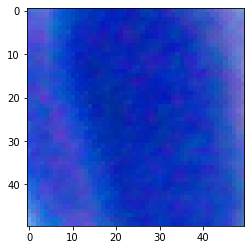

In [51]:
import cv2
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\taker\Desktop\COMPARTIDO AGOSTO 2019\AI25-1\VD.jpg", cv2.IMREAD_COLOR)

y=960
x=605
h=50
w=50
crop = image[y:y+h, x:x+w]
crop= cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(crop)
plt.imsave("crop_b.tiff", crop)
plt.show()

#for x in range (395,425):
  #  for y in range (315,345):

     #   pixel = image[x,y]
        #print(pixel)
        
#hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#for x in range (395,405):
 #   for y in range (315,325):

   #     pixel = hsv[x,y]
     #   print(pixel)


In [3]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt

train_features = []
train_labels   = []
# function to extract haralick textures from an image
image= cv2.imread('demo.tiff')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# calculate haralick texture features for 4 types of adjacency
textures = mt.features.haralick(gray)

# append the feature vector and label
train_features.append(features)
train_labels.append(cur_label)
# take the mean of it and return it
ht_mean  = textures.mean(axis=0)




NameError: name 'features' is not defined

In [64]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

# function to extract haralick textures from an image
def extract_features(image):
	# calculate haralick texture features for 4 types of adjacency
	textures = mt.features.haralick(image)

	# take the mean of it and return it
	ht_mean  = textures.mean(axis=0)
	return ht_mean


# empty list to hold feature vectors and train labels
train_features = []
train_labels   = []

# loop over the training dataset
print ("[STATUS] Started extracting haralick textures..")

file='crop_b.tiff'

# read the training image
image = cv2.imread(file)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# extract haralick texture from the image
features = extract_features(gray)

# append the feature vector and label
train_features.append(features)



[STATUS] Started extracting haralick textures..


[ 1.53182762e-03  2.90669825e+01  9.66307526e-01  4.34534454e+02
  2.27186150e-01  1.31922843e+02  1.70907083e+03  6.95975576e+00
  9.90111369e+00  6.35493655e-04  3.52053751e+00 -3.62551694e-01
  9.93546810e-01]


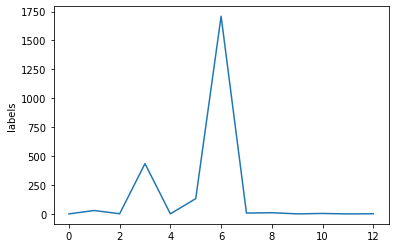

In [65]:
import matplotlib.pyplot as plt
print(features)
plt.plot(features)
plt.ylabel('labels')
plt.show()
np.savetxt("label_b.csv",features, delimiter=",", fmt="%s")

In [1]:
open 
clahe (enchanhed contrast)
RetFM-J (30-150)

<function io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)>